In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import EarlyStopping
import cv2

In [9]:
print("version: ",tf.__version__)
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_gpu_available())


version:  2.10.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [68]:

# Define the path to your dataset
data_dir = 'CK+48'

# Define image size and batch size
img_size = (48, 48)
batch_size = 16 #da el number of samples el byt3amalo process f elmara el wahda

# imagedatagen da utility f keras bysa3dak fel data augmentation
train_datagen = ImageDataGenerator(#dy el data bta3et el train
rescale=1./255,         #bn3mel rescale 3ashan teb2a el values kolaha maben 0 w 1  (btsa3dak fel neural network enaha t learn)
    shear_range=0.2,    #akenak btmayel el soura keda bel gamb wel 0,2 dy el intensity bta3et el meel
    horizontal_flip=True)              #el soura btt2alab men el shemal lel yemin
#w dy el validation
val_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True)
#w dy el test 
test_datagen = ImageDataGenerator(rescale=1./255)

# bn3mel generators lel training wel validation wel testing data

train_generator = train_datagen.flow_from_directory( #flow_from_directory dy el bt generate batches men el augmented data
    directory=os.path.join(data_dir, 'train'),
    color_mode='grayscale',     #bnkhaly el soura grayscale
    target_size=img_size,       #bnkhaly el sowar kolaha 48x48
    batch_size=batch_size,      #btkhal el number of samples f kol batch 16
    class_mode='categorical',      #ya3ny 3andena kaza class b label mokhtalefa
    shuffle=True,
    
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'val'),
    color_mode='grayscale',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    
)

test_generator = test_datagen.flow_from_directory(
    directory=os.path.join(data_dir, 'test'),
    color_mode='grayscale',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    
)




Found 792 images belonging to 7 classes.
Found 104 images belonging to 7 classes.
Found 85 images belonging to 7 classes.


In [69]:
# Example: Build and train a simple CNN model
model = tf.keras.Sequential([
   #conv dy el heya convulation w dy btakhod goz2 soghayar men el soura ttala3 meno 16 filter 3shan te3raf el features bta3et el soura
   tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)), #el relu btkhaly ay haga negative teb2a equal 0  
   #btsaghar el data el btshtaghal 3aleha w btakhod el max value 3shan t7aded aktar features bayna fel map
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   #b3id tany
   tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   #  tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
   #  tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   #b3id tany 
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(),#da bykhaly el data kolaha fel akher array wahed 3shan teb2a gahza lel dense layers
   tf.keras.layers.Dense(64, activation='relu'), #bt learn el data el gayalha men el flatten layer
   tf.keras.layers.Dropout(rate=0.5), #kol iteration btshil nos el neurons  3ashan t2alel el overfitting
   tf.keras.layers.Dense(7, activation='softmax') #bttala3 value maben 0 w 1 bt7aded el soura dy eh el emotion bta3ha 
                     #7 l 7 classes
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#btwa2af el train law fadal el val loss bizeed 8 epochs wara ba3d w y  return ahsan value gabha
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model.fit(train_generator, epochs=40, validation_data=val_generator, callbacks=[early_stopping])


# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}, Test loss: {test_loss}')

Epoch 1/40
50/50 [==============================] - 1s 19ms/step - loss: 1.8776 - accuracy: 0.2513 - val_loss: 1.8161 - val_accuracy: 0.2500
Epoch 2/40
50/50 [==============================] - 1s 13ms/step - loss: 1.8058 - accuracy: 0.2727 - val_loss: 1.6532 - val_accuracy: 0.2885
Epoch 3/40
50/50 [==============================] - 1s 13ms/step - loss: 1.5025 - accuracy: 0.4672 - val_loss: 1.2587 - val_accuracy: 0.5577
Epoch 4/40
50/50 [==============================] - 1s 14ms/step - loss: 1.2199 - accuracy: 0.5669 - val_loss: 1.1256 - val_accuracy: 0.6058
Epoch 5/40
50/50 [==============================] - 1s 14ms/step - loss: 1.0804 - accuracy: 0.5808 - val_loss: 0.9562 - val_accuracy: 0.6442
Epoch 6/40
50/50 [==============================] - 1s 13ms/step - loss: 0.9465 - accuracy: 0.6326 - val_loss: 0.9163 - val_accuracy: 0.6538
Epoch 7/40
50/50 [==============================] - 1s 13ms/step - loss: 0.8579 - accuracy: 0.6667 - val_loss: 0.8763 - val_accuracy: 0.6731
Epoch 8/40
50

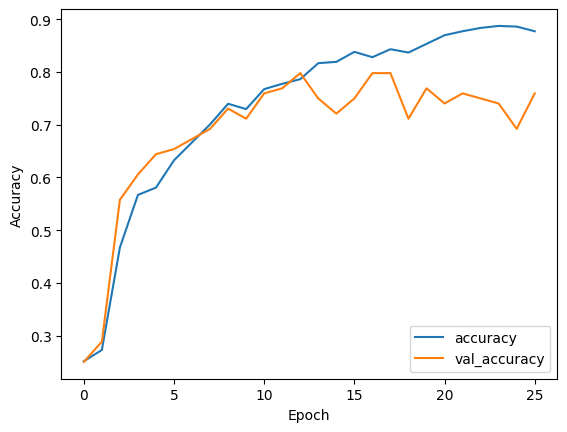

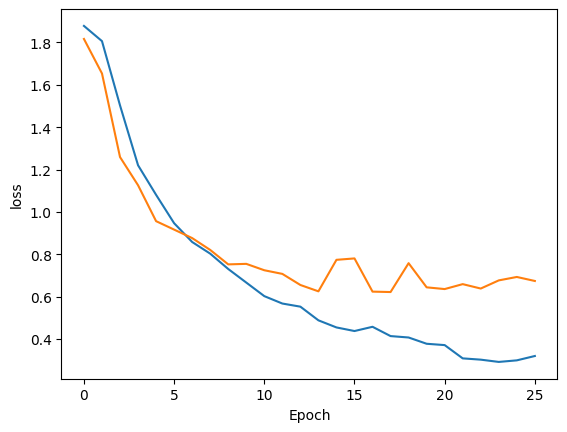

In [70]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [71]:
from sklearn.metrics import classification_report

# Directory containing the test dataset
test_dir = r'data\test'

# List of emotion folders (0, 1, 2, 3, 4, 5, 6)
emotion_folders = ['0', '1', '2', '3', '4', '5', '6']

# Load the trained model


# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []



# Iterate through each emotion folder in the test dataset
for emotion_folder in emotion_folders:
    folder_path = os.path.join(test_dir, emotion_folder)

   
    # Make predictions using the model
    predictions = model.predict(test_generator)

    # Get the predicted class index for each image
    predicted_class_indices = np.argmax(predictions, axis=1)

    # Get the true class labels
    true_labels.extend(test_generator.classes)
    predicted_labels.extend(predicted_class_indices)

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels, target_names=emotion_folders)
print(report)

6/6 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        91
           1       0.67      0.40      0.50        35
           2       0.82      0.93      0.87       105
           3       0.60      0.86      0.71        49
           4       1.00      1.00      1.00       105
           5       0.75      0.86      0.80        49
           6       0.96      0.96      0.96       161

    accuracy                           0.87       595
   macro avg       0.83      0.81      0.81       595
weighted avg       0.88      0.87      0.87       595



In [72]:
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 21, 21, 64)        9280      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 4, 4, 64)       

In [73]:
model.save('CK_model')

INFO:tensorflow:Assets written to: CK_model\assets


INFO:tensorflow:Assets written to: CK_model\assets


1/1 [==============================] - 3s 3s/step
Angry: 55.08%
Contempt: 0.18%
Disgust: 26.17%
Fear: 1.81%
Happy: 0.00%
Sad: 16.62%
Surprise: 0.14%


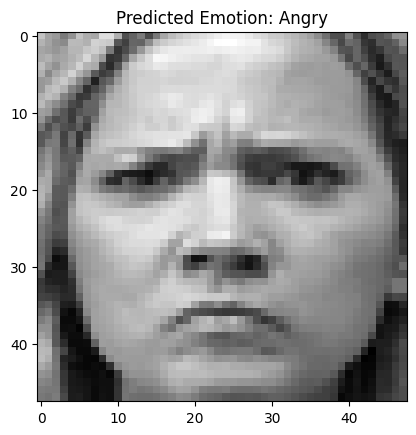

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\0\S503_001_00000070.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()


1/1 [==============================] - 0s 63ms/step
Angry: 14.47%
Contempt: 32.33%
Disgust: 6.84%
Fear: 24.95%
Happy: 6.73%
Sad: 10.14%
Surprise: 4.54%


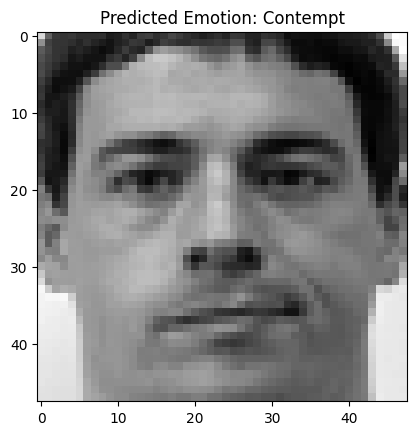

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\1\S506_002_00000008.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()


1/1 [==============================] - 0s 65ms/step
Angry: 0.01%
Contempt: 0.00%
Disgust: 99.81%
Fear: 0.02%
Happy: 0.15%
Sad: 0.00%
Surprise: 0.00%


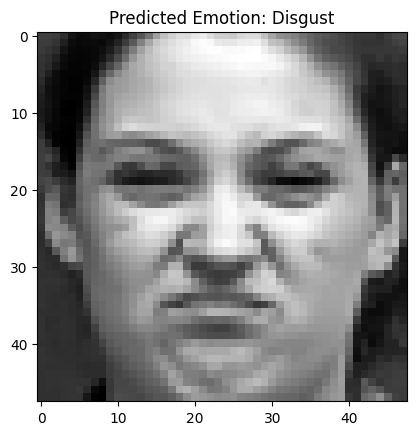

In [7]:
# Load the model
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\2\S129_011_00000018.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()


1/1 [==============================] - 0s 64ms/step
Angry: 0.07%
Contempt: 7.18%
Disgust: 0.36%
Fear: 75.37%
Happy: 6.19%
Sad: 2.32%
Surprise: 8.52%


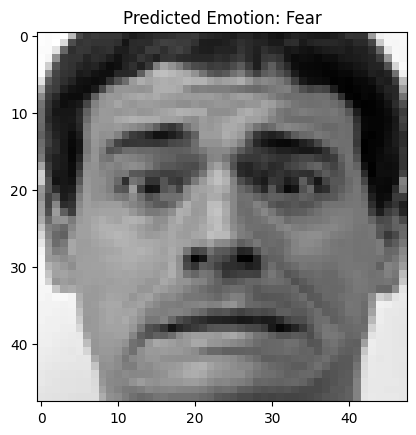

In [8]:
# Load the model
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\3\S506_004_00000036.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()


1/1 [==============================] - 0s 63ms/step
Angry: 0.00%
Contempt: 0.00%
Disgust: 0.00%
Fear: 0.00%
Happy: 100.00%
Sad: 0.00%
Surprise: 0.00%


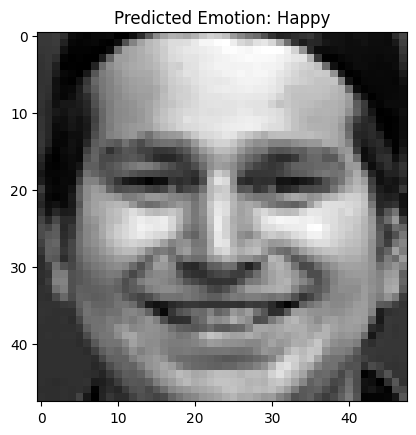

In [9]:
# Load the model
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\4\S134_004_00000015.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()


1/1 [==============================] - 0s 65ms/step
Angry: 12.62%
Contempt: 12.72%
Disgust: 7.60%
Fear: 7.67%
Happy: 0.98%
Sad: 55.00%
Surprise: 3.41%


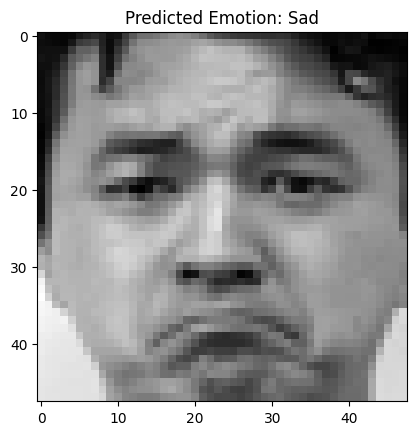

In [10]:
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\5\S505_006_00000019.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()

1/1 [==============================] - 0s 63ms/step
Angry: 0.00%
Contempt: 0.00%
Disgust: 0.00%
Fear: 0.00%
Happy: 0.00%
Sad: 0.00%
Surprise: 100.00%


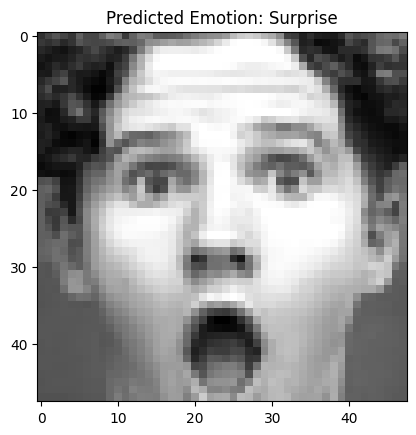

In [11]:
model = tf.keras.models.load_model('CK_model')

# Make predictions on a single image (you can adjust the path accordingly)
image_path = r'CK+48\test\6\S131_001_00000014.png'
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding emotion label
emotion_labels = ['Angry', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']
predicted_emotion = emotion_labels[predicted_class_index]

# Print the predicted scores for each emotion
for label, score in zip(emotion_labels, predictions[0]):
    print(f"{label.capitalize()}: {score * 100:.2f}%")

# Visualize the image
plt.imshow(img, cmap='gray')  # Use cmap='gray' for grayscale images
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.show()